# **TTI109 - Estatística**
# **Aula 04 - Estatística Descritiva 03**

Nessa aula vamos aprender a calcular:

* Medidas de tendêcia central (média, moda e mediana);
* Médias ponderadas;
* Média de uma distribuição de frequências.

# **Conjunto de dados**

A tabela registra uma amostra das alturas de alunos que compõem uma turma.

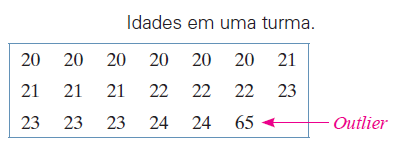

In [2]:
import pandas as pd
# Conjunto de dados
data = pd.Series([20, 20, 20, 20, 20, 20, 21,
                  21, 21, 21, 22, 22, 22, 23,
                  23, 23, 23, 24, 24, 65])

# **Construção do histograma da distribuição**

Nesse diagrama, identificaremos cada classe à uma idade. Então, devemos utilizar o parâmetro `freq=1` no método `interval_range` do `Pandas`.

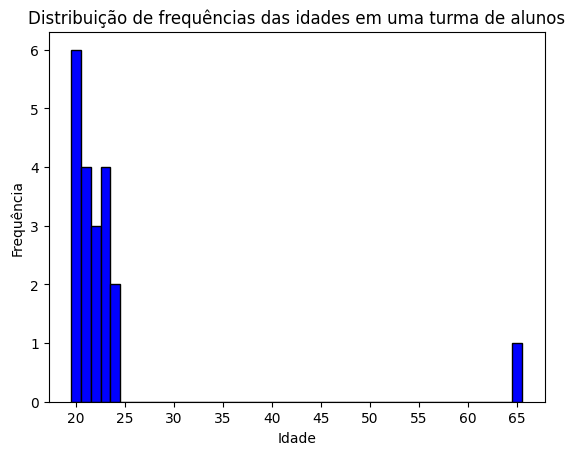

In [9]:
import matplotlib.pyplot as plt

# Construção do histograma
amp = data.max()-data.min()
eixo_x = list(range(data.min(), data.max()+1, 5))
classes = pd.interval_range(start=data.min()-0.5, end=data.max()+0.5, freq=1)
histograma = data.hist(bins=[classe.left for classe in classes]+[data.max()+0.5],
                       color='blue', edgecolor='black', grid=False)

# Inserção de atributos ao gráfico
histograma.set(xlabel='Idade', ylabel='Frequência',
               title='Distribuição de frequências das idades em uma turma de alunos',
               xticks=eixo_x)
plt.show()

# **Medidas de tendência central da distribuição**
O `Pandas Series` tem os métodos `mean` para o cálculo da média e `median` para a mediana. A moda é calculada pelo método `mode`. Aqui, a ressalva é que o retorno desse método é uma nova série, pois a distribuição pode ser multimodal.

In [10]:
# Cálculo das medidas de tendência central
media = data.mean()
print(f'A média da distribuição de idades é {media}.')
mediana = data.median()
print(f'A mediana da distribuição de idades é {mediana}.')
moda = list(data.mode()) # mode retorna uma série de dados!
print(f'A moda da distribuição de idades é {moda[0]}.')

A média da distribuição de idades é 23.75.
A mediana da distribuição de idades é 21.5.
A moda da distribuição de idades é 20.


# **Média ponderada de uma série de dados**

Você está frequentando uma disciplina na qual sua nota é determinada com base em 5 fontes: 50% da média de seu teste, 15% de sua prova bimestral, 20% de sua prova final, 10% de seu trabalho no laboratório de informática e 5% de seus deveres de casa. Suas notas são: 86 (média do teste), 96 (prova bimestral), 82 (prova final), 98 (laboratório) e 100 (dever de casa). Qual é a média ponderada de suas notas? Se a média mínima para um conceito A é 90, você obteve um A?

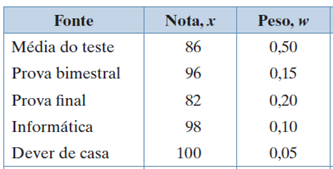

In [ ]:
# Criação do conjunto de dados
notas = pd.DataFrame({'Notas':[86, 96, 82, 98, 100],
                      'Pesos':[0.5, 0.15, 0.2, 0.1, 0.05]})
notas.index = ['Média do teste', 'Prova bimestral', 'Prova final',
               'Informática', 'Dever de casa']
display(notas)

# Cálculo da média ponderada - Usando a definição
media_ponderada = sum(notas['Notas'] * notas['Pesos']) / notas['Pesos'].sum()
print(f'A média final é {media_ponderada}.')

# Cálculo da média ponderada - Usando o numpy
import numpy as np
media_ponderada = np.average(a=notas['Notas'], weights=notas['Pesos'])
print(f'A média final é {media_ponderada}.')

,Notas,Pesos
Média do teste,86,0.50
Prova bimestral,96,0.15
Prova final,82,0.20
Informática,98,0.10
Dever de casa,100,0.05


A média final é 88.6.
A média final é 88.6.


# **Média ponderada por agrupamento de dados**
Vamos examinar um exemplo. Suponha que você fez uma compra de três tipos de produtos: chocolate, sorvete e biscoito. Você adquiriu três itens de cada produto, cada um deles produzido por um fabricante diferente. Assim cada item tem um preço e um "peso líquido" distinto. Qual o preço médio de cada tipo de produto?

In [11]:
# Função para o cálculo da média ponderada de um agrupamento
def media_ponderada(dataframe, col_valores, col_pesos):
    valores = dataframe[col_valores]
    pesos = dataframe[col_pesos]
    return (valores*pesos).sum() / pesos.sum()

# Criação do conjunto de dados
produtos = pd.DataFrame({'Nome_item': ['Chocolate', 'Chocolate', 'Chocolate',
                                       'Biscoito', 'Biscoito', 'Biscoito',
                                       'Sorvete', 'Sorvete', 'Sorvete'],
                          'Preço': [90, 50, 86, 87, 42, 48, 68, 92, 102],
                          'Peso': [4, 2, 3, 5, 6, 5, 3, 7, 5]})
display(produtos)

# Média ponderada agrupada pelo nome do item
medias = produtos.groupby('Nome_item').apply(media_ponderada, 'Preço', 'Peso')
display(medias)

# Preço méio de cada item
for indice in range(len(medias)):
  print(f'Preço médio do {medias.index[indice]}: {medias[indice]:.2f}')

,Nome_item,Preço,Peso
0,Chocolate,90,4
1,Chocolate,50,2
2,Chocolate,86,3
3,Biscoito,87,5
4,Biscoito,42,6
5,Biscoito,48,5
6,Sorvete,68,3
7,Sorvete,92,7
8,Sorvete,102,5


Nome_item
Biscoito     57.937500
Chocolate    79.777778
Sorvete      90.533333
dtype: float64

Preço médio do Biscoito: 57.94
Preço médio do Chocolate: 79.78
Preço médio do Sorvete: 90.53


# **Média de uma distribuição de frequência**
Voltemos ao exemplo da distribuição de frequência dos preços de navegadores GPS. Qual o preço médio de um navegador?

In [13]:
from math import ceil
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])

# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7

# Distribuição de frequência
dist = data.value_counts(bins=7).sort_index()

# Reconfiguração do conjunto de dados: Series para DataFrame
dist = pd.DataFrame(dist)
dist = dist.reset_index()
dist.columns = ['Classe', 'Frequência']

# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)

# Atribuição dos intervalos para a coluna Classe
dist['Classe'] = intervalos

# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]

# Inserção da coluna Pontos médios
dist['Pontos médios'] = pts_medios
display(dist)

# Cálculo da preço médio
obs = len(data)
preco = (dist['Frequência']*dist['Pontos médios']).sum()/obs
print(f'O preço médio de um navegador GPS é de US${preco:.2f}.')

,Classe,Frequência,Pontos médios
0,"(65, 105]",6,85.0
1,"(105, 145]",9,125.0
2,"(145, 185]",6,165.0
3,"(185, 225]",4,205.0
4,"(225, 265]",2,245.0
5,"(265, 305]",1,285.0
6,"(305, 345]",2,325.0


O preço médio de um navegador GPS é de US$162.33.
